In [1]:
# Description: This is a python program for finance
# Portfolio simple returns, daily returns
# Volatility

In [2]:
# Import Libraries
from datetime import datetime
import yfinance as yf
from yahoofinancials import YahooFinancials
import numpy as np
import pandas as pd
# import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# Get the stock simbles for
# the portfolio
# FAANG
stockSymbols = ["META", "AMZN", "AAPL","NFLX", "GOOG"]
# stockSymbols = ["MSFT"]


In [4]:
# Get the stock staring date
stockStartDate = '2013-01-01'

In [5]:
# Gte todays date and format it in the form
# YYYY-MM-DD
today = datetime.today().strftime('%Y-%m-%d')
today

'2023-01-18'

In [6]:
# Get the number of assets in the portfolio
numAssets = len(stockSymbols)
print('You have ' + str(numAssets) + ' assets in your portfolio.')

You have 5 assets in your portfolio.


In [7]:
# Create a function to get the stock
# price in the portfolio

def getMyPortfolio(stocks = stockSymbols, start = stockStartDate, end = today, col = 'Adj Close'):
    df1 = yf.download(stocks, start = stockStartDate, end = today)[col]
    # df1= msft.history(period="max")
    # msft = YahooFinancials(stocks)
    # data = msft.get_historical_price_data(start_date=start, end_date=end, time_interval='daily')
    # df1 = pd.DataFrame(data[stocks[2]]['prices'])[col]
    # # df2 = pd.DataFrame(data[stocks[1]]['prices'])[col]
    # # df3 = pd.DataFrame(data[stocks[2]]['prices'])[col]
    # # df4 = pd.DataFrame(data[stocks[3]]['prices'])[col]
    # # df5 = pd.DataFrame(data[stocks[4]]['prices'])[col]
    return df1

In [8]:
# Get the stock portfolio Adj. CLose price
#  ms1[stockSymbols[0]], ms2[stockSymbols[1]], ms3[stockSymbols[2]], ms4[stockSymbols[3]], ms5[stockSymbols[4]] = getMyPortfolio(stockSymbols)
ms1 = getMyPortfolio(stockSymbols)

[*********************100%***********************]  5 of 5 completed


In [9]:
ms1

,AAPL,AMZN,GOOG,META,NFLX
Date,,,,,
2013-01-02,16.862825,12.865500,18.013729,28.000000,13.144286
2013-01-03,16.649971,12.924000,18.024191,27.770000,13.798571
2013-01-04,16.186199,12.957500,18.380356,28.760000,13.711429
2013-01-07,16.090984,13.423000,18.300158,29.420000,14.171429
2013-01-08,16.134289,13.319000,18.264042,29.059999,13.880000
...,...,...,...,...,...
2023-01-10,130.729996,89.870003,89.239998,132.990005,327.540009
2023-01-11,133.490005,95.089996,92.260002,132.889999,327.260010
2023-01-12,133.410004,95.269997,91.910004,136.710007,330.130005


In [10]:
# Create a function to visulaize the protfolio
def showGraph(stocks = stockSymbols, start = stockStartDate, end = today, col = 'Adj Close'):
    
    # create a title for the porfolio
    title = 'Portfolio ' +col+ ' Price History'
    
    # get the stocks
    my_stocks = getMyPortfolio(stocks = stocks, start=start, end=end, col=col)

    # Give the figure a size
    plt.figure(figsize=(12.2, 4.5))
    
    # Loop through each stock and plot the price
    for c in my_stocks.columns.values:
        plt.plot(my_stocks[c], label = c, linewidth=1)
    
    plt.title(title)
    plt.xlabel('Date', fontsize = 18)
    plt.ylabel('Adj Close Price USD ($)', fontsize = 18)
    plt.legend(my_stocks.columns.values, loc='upper left')
    plt.show()

[*********************100%***********************]  5 of 5 completed


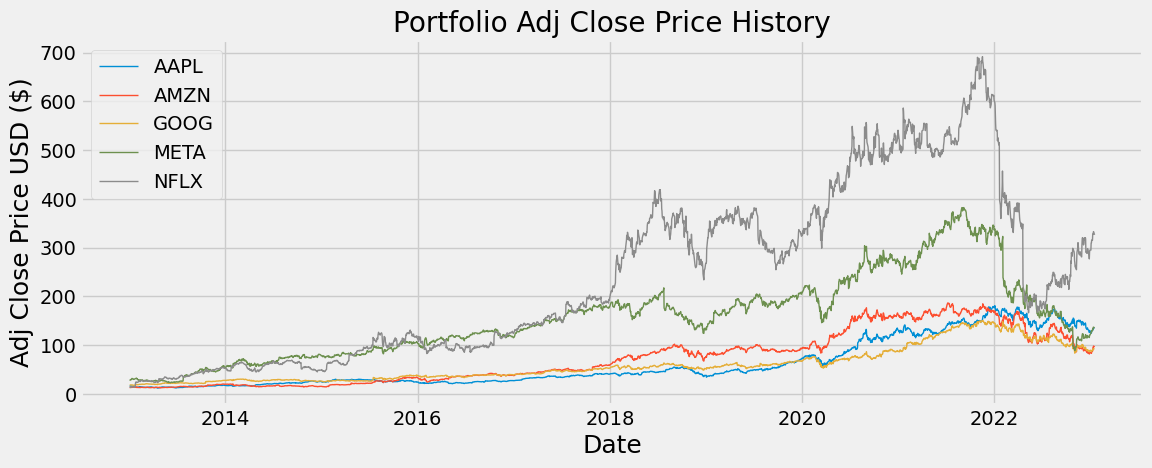

In [11]:
# Show the adjusted close price for FAANG
showGraph(stockSymbols)

In [12]:
# calculate the simple daily returns
daily_simple_returns = ms1.pct_change(1)

# show simple daily returns
daily_simple_returns

,AAPL,AMZN,GOOG,META,NFLX
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.012623,0.004547,0.000581,-0.008214,0.049777
2013-01-04,-0.027854,0.002592,0.019760,0.035650,-0.006315
2013-01-07,-0.005882,0.035925,-0.004363,0.022949,0.033549
2013-01-08,0.002691,-0.007748,-0.001974,-0.012237,-0.020565
...,...,...,...,...,...
2023-01-10,0.004456,0.028732,0.004955,0.027188,0.039249
2023-01-11,0.021112,0.058084,0.033841,-0.000752,-0.000855
2023-01-12,-0.000599,0.001893,-0.003794,0.028746,0.008770


In [13]:
# show the stock correlation
daily_simple_returns.corr()

,AAPL,AMZN,GOOG,META,NFLX
AAPL,1.000000,0.505726,0.571397,0.479115,0.315551
AMZN,0.505726,1.000000,0.631194,0.542159,0.478662
GOOG,0.571397,0.631194,1.000000,0.593809,0.433749
META,0.479115,0.542159,0.593809,1.000000,0.412982
NFLX,0.315551,0.478662,0.433749,0.412982,1.000000


In [14]:
# show the covariance matrix for the simple returns
daily_simple_returns.cov()

,AAPL,AMZN,GOOG,META,NFLX
AAPL,0.000335,0.000191,0.000179,0.000210,0.000174
AMZN,0.000191,0.000423,0.000222,0.000268,0.000296
GOOG,0.000179,0.000222,0.000291,0.000243,0.000223
META,0.000210,0.000268,0.000243,0.000576,0.000298
NFLX,0.000174,0.000296,0.000223,0.000298,0.000903


In [15]:
# show the variance
daily_simple_returns.var()

AAPL    0.000335
AMZN    0.000423
GOOG    0.000291
META    0.000576
NFLX    0.000903
dtype: float64

In [16]:
# print the standard deviation for daily simple returns
print("The stock Volatility:")
daily_simple_returns.std()

The stock Volatility:


AAPL    0.018310
AMZN    0.020578
GOOG    0.017072
META    0.023991
NFLX    0.030055
dtype: float64

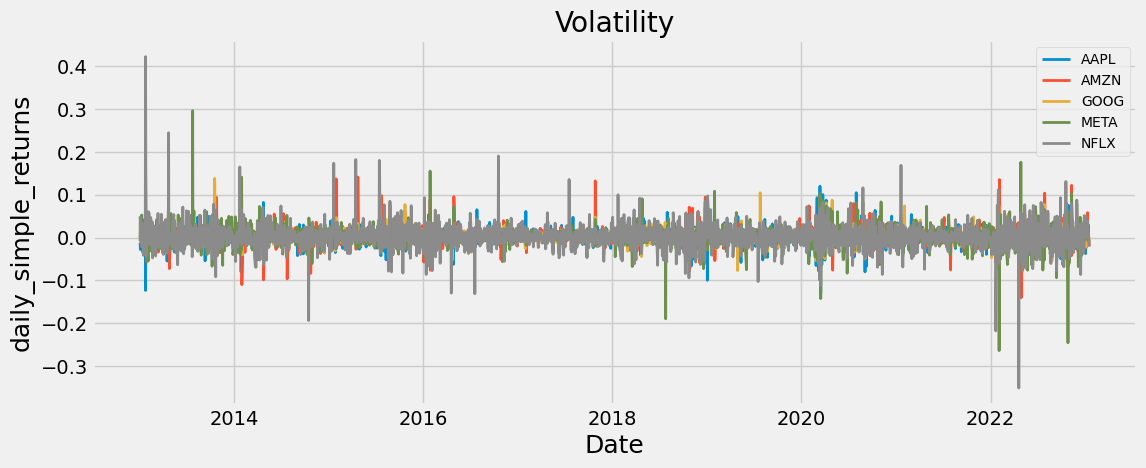

In [17]:
# visualize the stocks daily simple returns
plt.figure(figsize=(12, 4.5))

# Loop throgh each stock and plot the simple returns
for c in daily_simple_returns.columns.values:
    plt.plot(daily_simple_returns[c], lw=2, label=c)
    
# create a legend
plt.title("Volatility")
plt.xlabel('Date', fontsize = 18)
plt.ylabel('daily_simple_returns', fontsize = 18)
plt.legend(loc='upper right', fontsize=10)
plt.show()

In [18]:
# Sow the meanof the daily simple returns
dailyMeanSimpleReturns = daily_simple_returns.mean()

# print
print("The daily mean simple returns:\n ")
print(dailyMeanSimpleReturns)

The daily mean simple returns:
 
AAPL    0.000994
AMZN    0.001007
GOOG    0.000791
META    0.000914
NFLX    0.001720
dtype: float64


In [ ]:
# expected portfolio daily returns
#40% META, 10% AMZN, 30% AAPL, 10% NFLX, 10% GOOG
randomWeight = np.array([0.1, 0.1, 0.1, 0.3, 0.4])

portFolioSimpleReturn = np.sum(dailyMeanSimpleReturns*randomWeight)

# Print the expected portfolio return
print("The daily expected portfolio return: "+ str(portFolioSimpleReturn))

In [ ]:
# get the yearly simple return
print("Expected annualised portfolio simple return: " + str(portFolioSimpleReturn*253))

In [ ]:
# calculate the growth of the investment 
dailyCummulSimpleReturn = (daily_simple_returns+1).cumprod()

# Show the cummulative simple returns
dailyCummulSimpleReturn

In [ ]:
# visualize the stocks daily cummulative simple returns
plt.figure(figsize=(12, 4.5))

# Loop throgh each stock and plot the simple returns
for c in dailyCummulSimpleReturn.columns.values:
    plt.plot(dailyCummulSimpleReturn[c], lw=2, label=c)
    
# create a legend
plt.title("Daily Cumulative Simple Returns")
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Growth of investment', fontsize = 18)
plt.legend(loc='upper left', fontsize=10)
plt.show()